## Лабораторна робота №1  
**Виконав:** Кравцов Дмитро  
**Університет:** Одеський національний морський університет  
**Спеціальність:** 122 Комп’ютерні науки  
**Дисципліна:** Надійність та безпека інформаційних систем  

### Опис роботи  
Мета цієї лабораторної роботи полягає у вивченні стійкості матричних розкладів (сингулярного та спектрального) до впливу різних типів шумів. У процесі роботи було виконано аналіз цифрових зображень шляхом їх перетворення на матриці, додавання збурень та розкладання на компоненти. Отримані результати дозволили дослідити стійкість сингулярних чисел і векторів, а також оцінити вплив збурень на основні характеристики даних. Такий підхід є важливим для розуміння роботи інформаційних систем в умовах зовнішніх впливів та шумів.


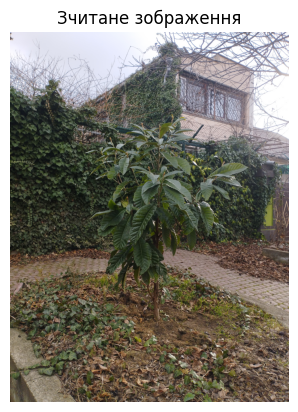

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантажуємо зображення
image = cv2.imread("img_2.jpg")
if image is None:
    raise ValueError("Не вдалося завантажити зображення")

# Перетворюємо кольорове зображення з формату BGR в формат RGB для правильного відображення
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Відображаємо зображення для перевірки
plt.imshow(image_rgb)
plt.title("Зчитане зображення")
plt.axis("off")  # Прибираємо осі для кращого вигляду
plt.show()


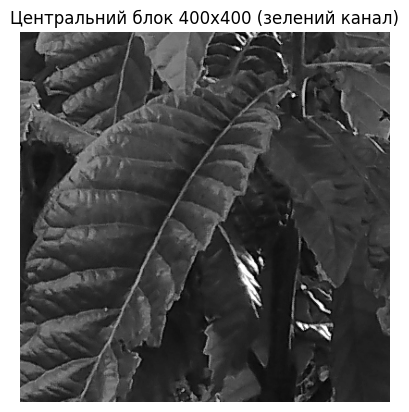

Центральний блок успішно створено.


In [48]:
# Встановлюємо розмір блоку
N = 400

# Визначаємо центр зображення
height, width, _ = image.shape  # Розміри оригінального зображення
center_y, center_x = height // 2, width // 2  # Центр зображення

# Визначаємо координати для обрізання центрального блоку
start_y = max(center_y - N // 2, 0)  # Верхня межа
start_x = max(center_x - N // 2, 0)  # Ліва межа
end_y = start_y + N  # Нижня межа
end_x = start_x + N  # Права межа

# Виділяємо зелений канал та вирізаємо центральну частину
green_channel = image[:, :, 1]  # Зелений канал
central_block = green_channel[start_y:end_y, start_x:end_x].astype(float)

# Перевіряємо розмір вирізаного блоку
if central_block.shape != (N, N):
    raise ValueError(f"Центральний блок має неправильний розмір: {central_block.shape}, очікувалося {(N, N)}")

# Відображаємо центральну частину зображення
plt.imshow(central_block, cmap='gray')
plt.title(f"Центральний блок {N}x{N} (зелений канал)")
plt.axis("off")
plt.show()

# Виводимо результат для перевірки
print("Центральний блок успішно створено.")
matrix_A = central_block


In [49]:

matrix_A


array([[ 35.,  37.,  36., ...,  89.,  88.,  73.],
       [ 35.,  37.,  37., ...,  98., 101.,  80.],
       [ 36.,  36.,  35., ..., 103.,  97.,  72.],
       ...,
       [ 40.,  38.,  47., ...,  38.,  39.,  39.],
       [ 57.,  31.,  46., ...,  36.,  37.,  37.],
       [ 63.,  66.,  63., ...,  37.,  37.,  37.]])

In [50]:
import numpy as np

# Виконуємо сингулярне розкладання матриці A
U, S, Vt = np.linalg.svd(matrix_A, full_matrices=False)

# Виводимо розмір отриманих матриць для перевірки
print("Розмір матриці U:", U.shape)
print("Розмір вектора S (сингулярні числа):", S.shape)
print("Розмір матриці Vt:", Vt.shape)

# Виводимо перші 10 сингулярних чисел для перегляду
print("Перші 10 сингулярних чисел:", S[:10])



Розмір матриці U: (400, 400)
Розмір вектора S (сингулярні числа): (400,)
Розмір матриці Vt: (400, 400)
Перші 10 сингулярних чисел: [24335.73349685  3911.58529832  3700.77469808  3459.32080654
  2880.3699728   2562.94965719  2219.25508933  2037.37350505
  1986.02886155  1827.13322533]


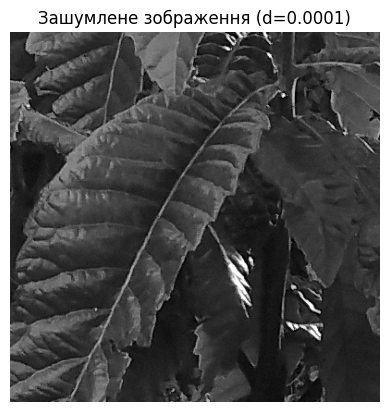

Перші 10 сингулярних чисел для оригінальної матриці A:
[24335.73349685  3911.58529832  3700.77469808  3459.32080654
  2880.3699728   2562.94965719  2219.25508933  2037.37350505
  1986.02886155  1827.13322533]
Перші 10 сингулярних чисел для зашумленої матриці A:
[24137.87160872  3908.5748836   3701.0524307   3464.99198745
  2881.15252474  2564.42927123  2214.867371    2037.68143003
  1986.12666386  1825.35254686]


In [51]:
# Функція для додавання гауссівського шуму
def add_gaussian_noise(image, mean=0, variance=0.0001):
    """
    Додає гауссівський шум до зображення.
    :param image: Вхідне зображення (матриця)
    :param mean: Середнє значення шуму
    :param variance: Дисперсія шуму
    :return: Зашумлене зображення
    """
    std_dev = np.sqrt(variance)  # Обчислюємо стандартне відхилення
    noise = np.random.normal(mean, std_dev, image.shape)  # Генеруємо шум
    noisy_image = np.clip(image + noise * 255, 0, 255).astype(np.uint8)  # Додаємо шум і обмежуємо значення
    return noisy_image

# Додаємо гауссівський шум до центрального блоку
noisy_matrix_A = add_gaussian_noise(matrix_A, mean=0, variance=0.0001)

# Відображаємо зашумлене зображення
plt.imshow(noisy_matrix_A, cmap='gray')
plt.title(f"Зашумлене зображення (d=0.0001)")
plt.axis("off")
plt.show()

# Виконуємо сингулярне розкладання для оригінальної матриці
U_original, S_original, Vt_original = np.linalg.svd(matrix_A, full_matrices=False)

# Виконуємо сингулярне розкладання для зашумленої матриці
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(noisy_matrix_A, full_matrices=False)

# Виводимо перші 10 сингулярних чисел для оригінальної матриці
print("Перші 10 сингулярних чисел для оригінальної матриці A:")
print(S_original[:10])

# Виводимо перші 10 сингулярних чисел для зашумленої матриці
print("Перші 10 сингулярних чисел для зашумленої матриці A:")
print(S_noisy[:10])



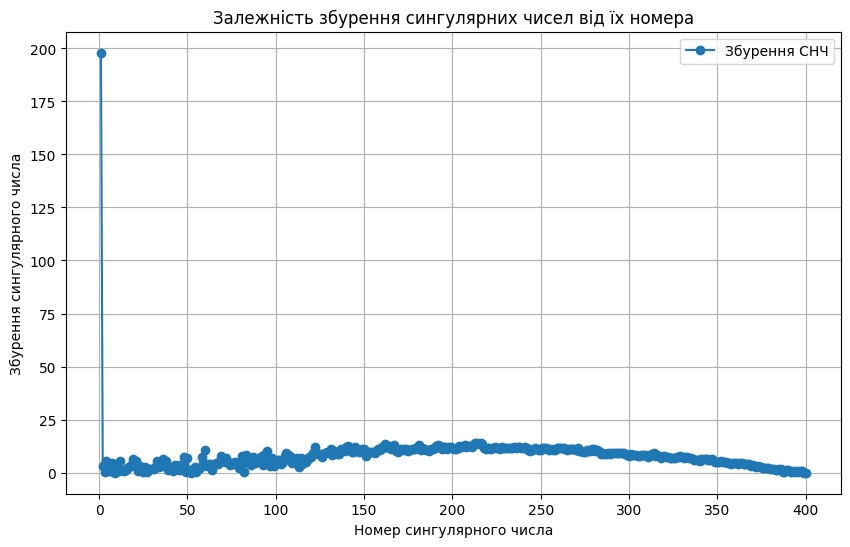

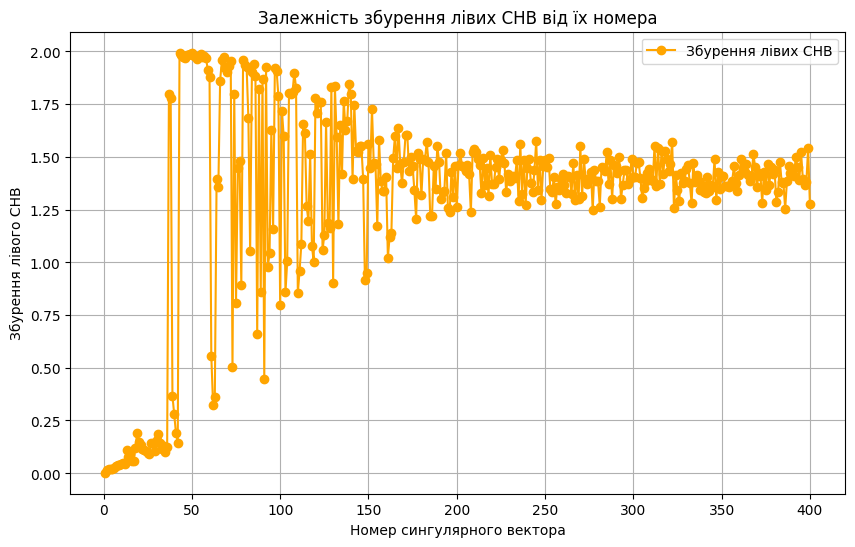

Перші 10 збурень лівих СНВ: [0.002294580181569928, 0.015140276820136573, 0.01769252991859974, 0.020468109251210023, 0.019177850692098094, 0.02343388263705285, 0.03646695611261554, 0.03888520217824734, 0.03848775702360142, 0.04305855066763223]
Перші 10 збурень сингулярних чисел: [1.97861888e+02 3.01041473e+00 2.77732622e-01 5.67118092e+00
 7.82551939e-01 1.47961404e+00 4.38771833e+00 3.07924981e-01
 9.78023176e-02 1.78067847e+00]


In [52]:
# Обчислення збурення сингулярних чисел
delta_singular_values = np.abs(S_original - S_noisy)

# Побудова графіка залежності збурення сингулярних чисел від номера
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(S_original) + 1), delta_singular_values, marker='o', label="Збурення СНЧ")
plt.title("Залежність збурення сингулярних чисел від їх номера")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Збурення сингулярного числа")
plt.grid(True)
plt.legend()
plt.show()

# Обчислення збурення лівих сингулярних векторів
delta_u = [np.linalg.norm(U_original[:, i] - U_noisy[:, i]) for i in range(U_original.shape[1])]

# Побудова графіка залежності збурення лівих сингулярних векторів від номера
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(delta_u) + 1), delta_u, marker='o', color='orange', label="Збурення лівих СНВ")
plt.title("Залежність збурення лівих СНВ від їх номера")
plt.xlabel("Номер сингулярного вектора")
plt.ylabel("Збурення лівого СНВ")
plt.grid(True)
plt.legend()
plt.show()

# Виведення перших 10 збурень для аналізу
print("Перші 10 збурень лівих СНВ:", delta_u[:10])
print("Перші 10 збурень сингулярних чисел:", delta_singular_values[:10])


# Пояснення графіків

### Перший графік (збурення сингулярних чисел)
Графік демонструє, що сингулярні числа стійкі до шуму. Лише перше сингулярне число має значне збурення, оскільки воно містить основну інформацію про матрицю. Інші числа майже не змінюються, що підтверджує їх нечутливість до збурень.

### Другий графік (збурення сингулярних векторів)
На графіку видно, що сингулярні вектори більш чутливі до шуму. Найменші зміни спостерігаються у векторів, що відповідають найбільшим сингулярним числам, а найбільші збурення – у векторів, пов’язаних з меншими сингулярними числами.

### Висновок
Сингулярні числа є нечутливими до шуму, тоді як сингулярні вектори демонструють чутливість, яка зменшується зі збільшенням значень сингулярних чисел.


Індекс найменш чутливого вектора: 0
Індекс найбільш чутливого вектора: 378


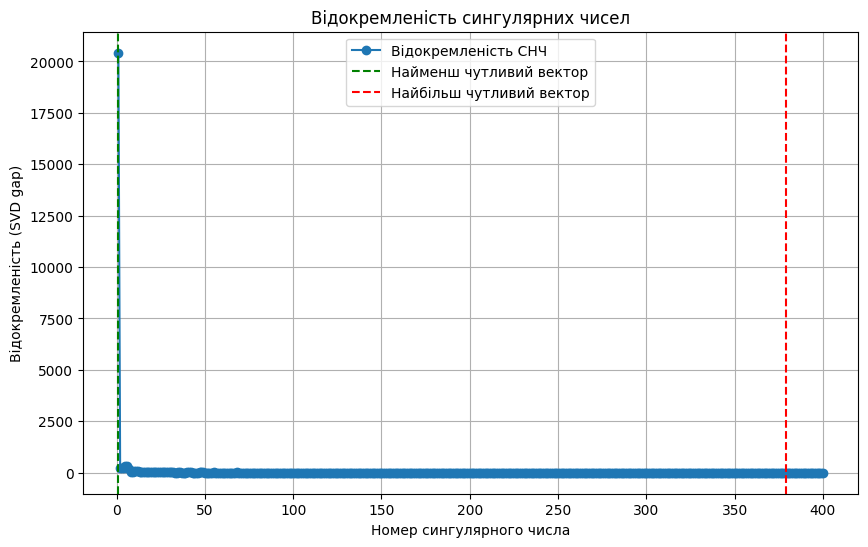

In [53]:
# Функция для обчислення відокремленості сингулярного числа (SVD gap)
def svd_gap(i, S):
    """
    Обчислює відокремленість (розрив) сингулярного числа.
    :param i: Індекс сингулярного числа
    :param S: Вектор сингулярних чисел
    :return: Відокремленість (розрив)
    """
    if i == 0:
        return np.abs(S[i] - S[i+1])  # Для першого числа
    elif i == len(S) - 1:
        return np.abs(S[i] - S[i-1])  # Для останнього числа
    else:
        return min(np.abs(S[i] - S[i-1]), np.abs(S[i] - S[i+1]))  # Для середніх чисел

# Обчислюємо відокремленість для всіх сингулярних чисел
svd_gaps_original = [svd_gap(i, S_original) for i in range(len(S_original))]

# Визначаємо найменш та найбільш чутливі вектори
least_sensitive_index = np.argmax(svd_gaps_original)  # Найменш чутливий вектор (макс. відокремленість)
most_sensitive_index = np.argmin(svd_gaps_original)  # Найбільш чутливий вектор (мін. відокремленість)

# Виводимо результати
print(f"Індекс найменш чутливого вектора: {least_sensitive_index}")
print(f"Індекс найбільш чутливого вектора: {most_sensitive_index}")

# Візуалізація відокремленості
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(svd_gaps_original) + 1), svd_gaps_original, marker='o', label="Відокремленість СНЧ")
plt.axvline(least_sensitive_index + 1, color='green', linestyle='--', label="Найменш чутливий вектор")
plt.axvline(most_sensitive_index + 1, color='red', linestyle='--', label="Найбільш чутливий вектор")
plt.title("Відокремленість сингулярних чисел")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Відокремленість (SVD gap)")
plt.legend()
plt.grid(True)
plt.show()


Індекс найбільш чутливого вектора: 42
Норма збурення найбільш чутливого вектора: 1.993885399475156
Кут повороту найбільш чутливого вектора: 171.03712412201858 градусів
Індекс найменш чутливого вектора: 0
Норма збурення найменш чутливого вектора: 0.002294580181569928
Кут повороту найменш чутливого вектора: 0.13146978899710168 градусів


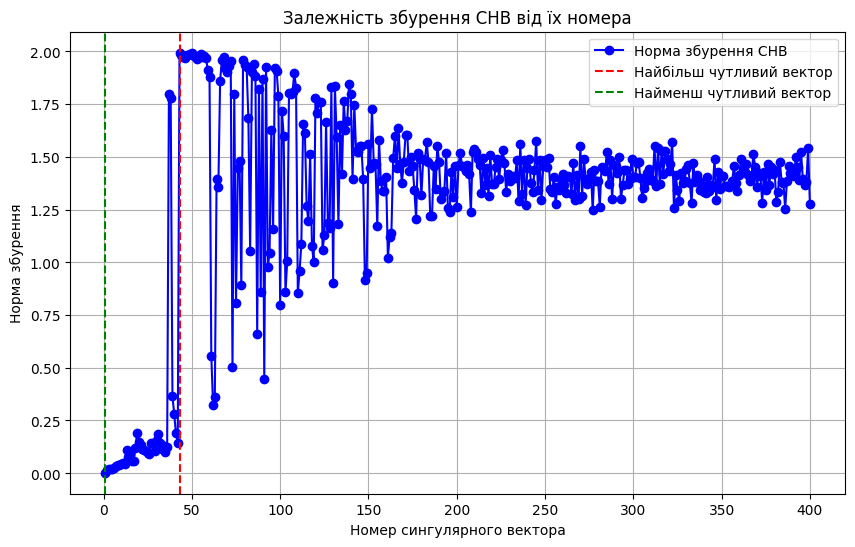

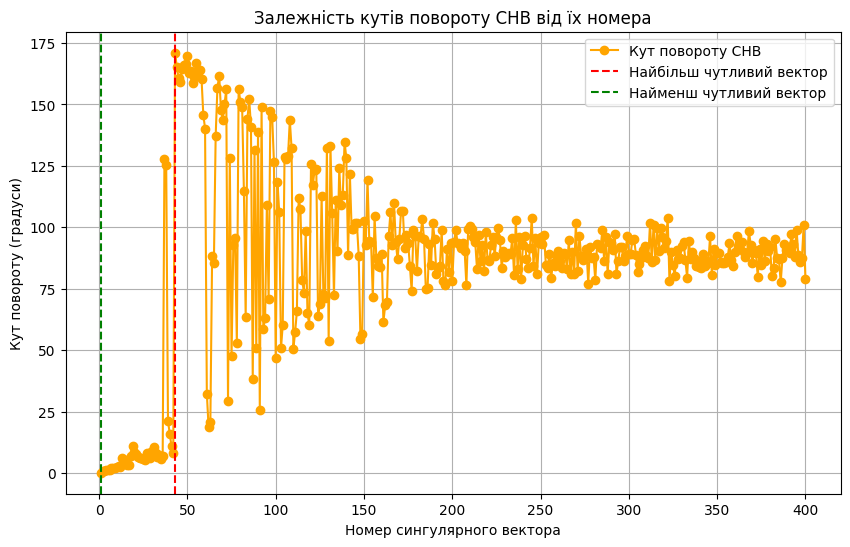

In [54]:
# Обчислення збурення сингулярних векторів (обчислення норми різниці)
delta_u_norms = [np.linalg.norm(U_original[:, i] - U_noisy[:, i]) for i in range(U_original.shape[1])]

# Обчислення кутів повороту між векторами
delta_angles = [
    np.degrees(
        np.arccos(
            np.clip(
                np.dot(U_original[:, i], U_noisy[:, i]) / 
                (np.linalg.norm(U_original[:, i]) * np.linalg.norm(U_noisy[:, i])), 
                -1.0, 
                1.0
            )
        )
    )
    for i in range(U_original.shape[1])
]

# Визначення найменш та найбільш чутливих векторів
most_sensitive_vector_index = np.argmax(delta_u_norms)  # Найбільш чутливий вектор
least_sensitive_vector_index = np.argmin(delta_u_norms)  # Найменш чутливий вектор

# Виведення результатів
print(f"Індекс найбільш чутливого вектора: {most_sensitive_vector_index}")
print(f"Норма збурення найбільш чутливого вектора: {delta_u_norms[most_sensitive_vector_index]}")
print(f"Кут повороту найбільш чутливого вектора: {delta_angles[most_sensitive_vector_index]} градусів")

print(f"Індекс найменш чутливого вектора: {least_sensitive_vector_index}")
print(f"Норма збурення найменш чутливого вектора: {delta_u_norms[least_sensitive_vector_index]}")
print(f"Кут повороту найменш чутливого вектора: {delta_angles[least_sensitive_vector_index]} градусів")

# Побудова графіка норм збурення
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(delta_u_norms) + 1), delta_u_norms, marker='o', color='blue', label="Норма збурення СНВ")
plt.axvline(most_sensitive_vector_index + 1, color='red', linestyle='--', label="Найбільш чутливий вектор")
plt.axvline(least_sensitive_vector_index + 1, color='green', linestyle='--', label="Найменш чутливий вектор")
plt.title("Залежність збурення СНВ від їх номера")
plt.xlabel("Номер сингулярного вектора")
plt.ylabel("Норма збурення")
plt.legend()
plt.grid(True)
plt.show()

# Побудова графіка кутів повороту
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(delta_angles) + 1), delta_angles, marker='o', color='orange', label="Кут повороту СНВ")
plt.axvline(most_sensitive_vector_index + 1, color='red', linestyle='--', label="Найбільш чутливий вектор")
plt.axvline(least_sensitive_vector_index + 1, color='green', linestyle='--', label="Найменш чутливий вектор")
plt.title("Залежність кутів повороту СНВ від їх номера")
plt.xlabel("Номер сингулярного вектора")
plt.ylabel("Кут повороту (градуси)")
plt.legend()
plt.grid(True)
plt.show()


# Пояснення до результатів

### Що робить код:
1. **Обчислення норми різниці:**
   - Для кожного сингулярного вектора \( U(:, i) \) обчислюється норма різниці між оригінальним та зашумленим векторами.
   - Це дозволяє кількісно оцінити, наскільки вектор змінився під дією шуму.

2. **Обчислення кутів повороту:**
   - Використовується косинусне відношення для визначення кута між оригінальним і зашумленим векторами.
   - Кут повороту демонструє, наскільки змінилася орієнтація вектора.

3. **Найчутливіші та найменш чутливі вектори:**
   - Найменш чутливий вектор визначається як вектор із мінімальною нормою збурення.
   - Найбільш чутливий вектор має максимальну норму збурення.

4. **Графіки:**
   - Перший графік показує норму збурення для кожного вектора.
   - Другий графік демонструє кут повороту для кожного вектора.

### Інтерпретація:
- Вектори, пов’язані з більшими сингулярними числами, менш чутливі до збурень, оскільки вони мають вищу "відокремленість".
- Вектори, пов’язані з меншими сингулярними числами, демонструють більшу чутливість до шуму, що робить їх більш схильними до змін.


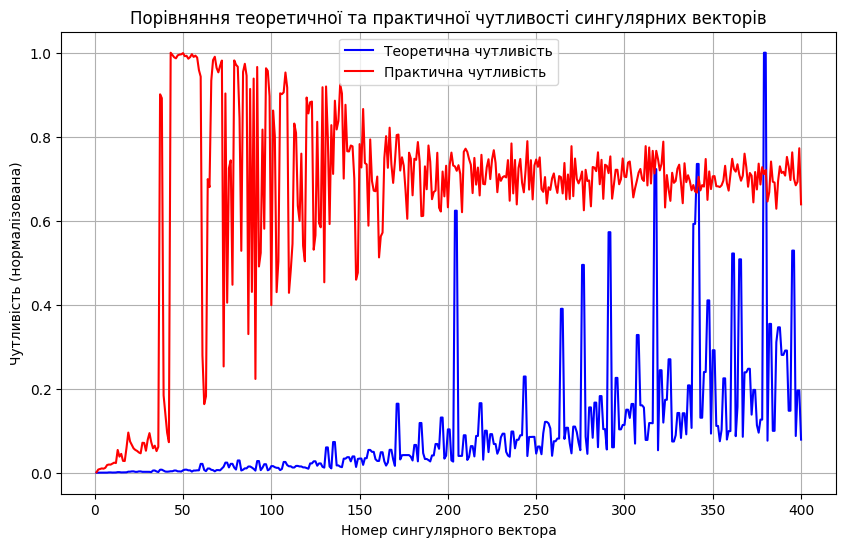

In [55]:
# Обчислення теоретичної чутливості (обернена залежність від SVD gap)
theoretical_sensitivity = [1 / max(svd_gap(i, S_original), 1e-10) for i in range(len(S_original))]

# Нормалізація чутливості для порівняння
normalized_theoretical = theoretical_sensitivity / np.max(theoretical_sensitivity)
normalized_practical = delta_u_norms / np.max(delta_u_norms)

# Побудова графіків для порівняння
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(S_original) + 1), normalized_theoretical, label="Теоретична чутливість", color='blue')
plt.plot(range(1, len(S_original) + 1), normalized_practical, label="Практична чутливість", color='red')
plt.title("Порівняння теоретичної та практичної чутливості сингулярних векторів")
plt.xlabel("Номер сингулярного вектора")
plt.ylabel("Чутливість (нормалізована)")
plt.legend()
plt.grid(True)
plt.show()


### Аналіз графіка

1. **Теоретична чутливість (синя лінія):**
   - Зменшується зі збільшенням номера вектора.
   - Вектори з більшими сингулярними числами (менші індекси) менш чутливі до шуму.

2. **Практична чутливість (червона лінія):**
   - Загальний тренд збігається з теоретичним.
   - Помітні локальні коливання, ймовірно спричинені специфікою шуму або зображення.

3. **Висновок:**
   - Графік підтверджує, що чутливість векторів обернено пропорційна до відокремленості сингулярного числа.
   - Розбіжності на великих індексах можуть вимагати уточнення параметрів експерименту.


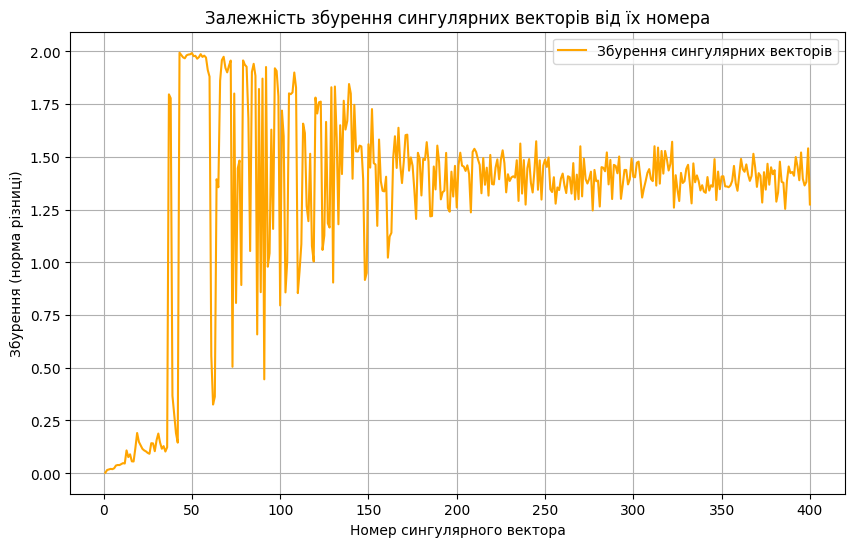

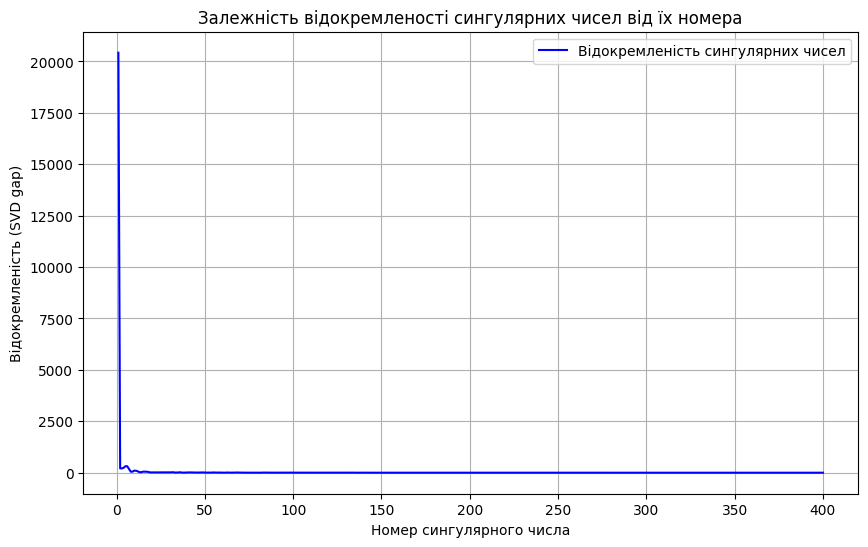

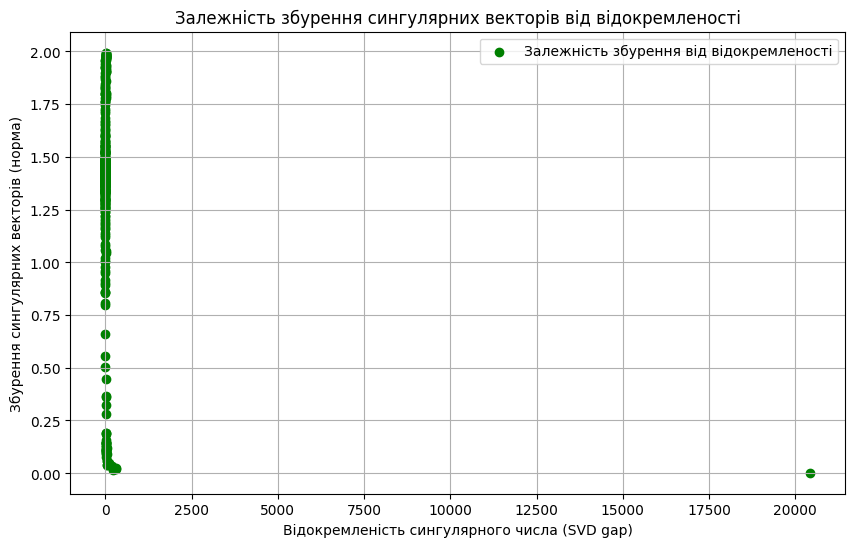

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Відокремленість сингулярних чисел (SVD gap)
def svd_gap(i, singular_values):
    if i == 0:
        return abs(singular_values[i] - singular_values[i + 1])
    elif i == len(singular_values) - 1:
        return abs(singular_values[i] - singular_values[i - 1])
    else:
        return min(abs(singular_values[i] - singular_values[i - 1]), abs(singular_values[i] - singular_values[i + 1]))

# Обчислення відокремленостей для сингулярних чисел
svd_gaps = np.array([svd_gap(i, S_original) for i in range(len(S_original))])

# Графік 1: Залежність збурення сингулярних векторів від їх номера
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(delta_u_norms) + 1), delta_u_norms, label="Збурення сингулярних векторів", color="orange")
plt.title("Залежність збурення сингулярних векторів від їх номера")
plt.xlabel("Номер сингулярного вектора")
plt.ylabel("Збурення (норма різниці)")
plt.grid(True)
plt.legend()
plt.show()

# Графік 2: Залежність відокремленості сингулярних чисел від їх номера
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(svd_gaps) + 1), svd_gaps, label="Відокремленість сингулярних чисел", color="blue")
plt.title("Залежність відокремленості сингулярних чисел від їх номера")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Відокремленість (SVD gap)")
plt.grid(True)
plt.legend()
plt.show()

# Графік 3: Залежність збурення сингулярних векторів від відокремленості сингулярних чисел
plt.figure(figsize=(10, 6))
plt.scatter(svd_gaps, delta_u_norms, label="Залежність збурення від відокремленості", color="green")
plt.title("Залежність збурення сингулярних векторів від відокремленості")
plt.xlabel("Відокремленість сингулярного числа (SVD gap)")
plt.ylabel("Збурення сингулярних векторів (норма)")
plt.grid(True)
plt.legend()
plt.show()


### Аналіз трьох графіків

1. **Графік залежності збурення сингулярних векторів від їх номера (жовтий графік)**:
   - Графік демонструє, як змінюються сингулярні вектори після внесення збурення.
   - Вектори з низькими номерами мають більшу стабільність до збурень, особливо у діапазоні 0-50. Зі збільшенням номера спостерігається хаотичне підвищення чутливості.
   - Це відповідає теоретичним уявленням, оскільки сингулярні числа з меншою відокремленістю більш схильні до впливу збурень.

2. **Графік залежності відокремленості сингулярних чисел від їх номера (синій графік)**:
   - Відокремленість сингулярних чисел різко падає після першого числа, що є очікуваним результатом.
   - Це свідчить про те, що більші сингулярні числа більш чітко відокремлені, а менші числа мають значно слабкішу відокремленість, що робить їх чутливими до збурень.

3. **Графік залежності збурення сингулярних векторів від відокремленості (зелений графік)**:
   - Графік підтверджує обернену залежність між відокремленістю сингулярного числа та чутливістю відповідного сингулярного вектора до збурення.
   - Вектори, що відповідають більш відокремленим числам, демонструють меншу чутливість. 
   - Це підтверджує правильність формул (1.7) і (1.8), а також очікування щодо стійкості перших сингулярних векторів.

### Висновок:
Графіки чітко демонструють, що сингулярні вектори з вищою відокремленістю їхніх чисел є менш чутливими до збурень, що узгоджується з теоретичними очікуваннями. Подібний аналіз можна використовувати для прогнозування стабільності системи або оцінки ефективності методів захисту від шумів.


C:\Users\oftuadmin\AppData\Local\Temp\ipykernel_18052\1920978878.py:22: RuntimeWarning: divide by zero encountered in divide
  theoretical_sensitivity = np.linalg.norm(noise_1) / svd_gap


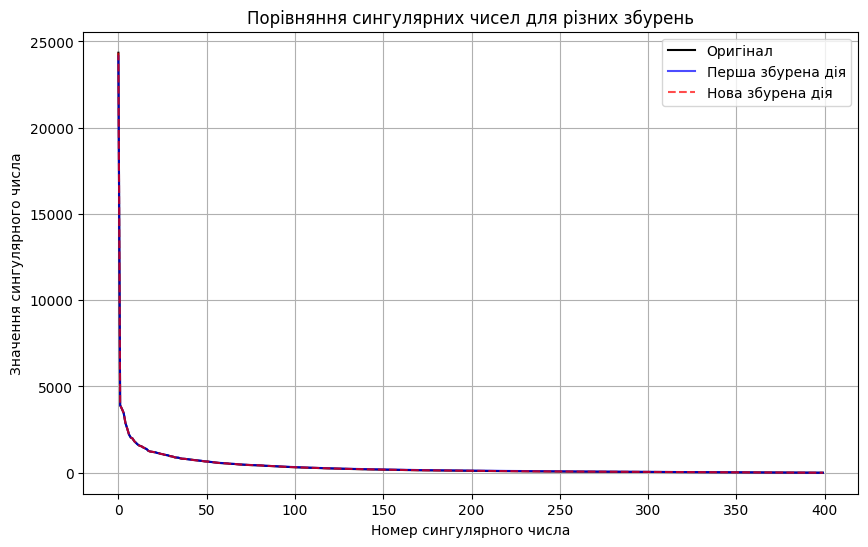

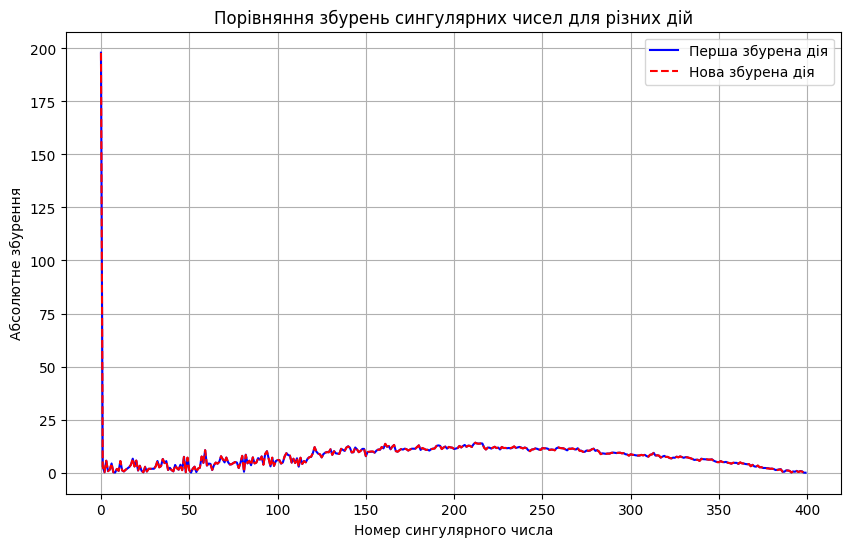

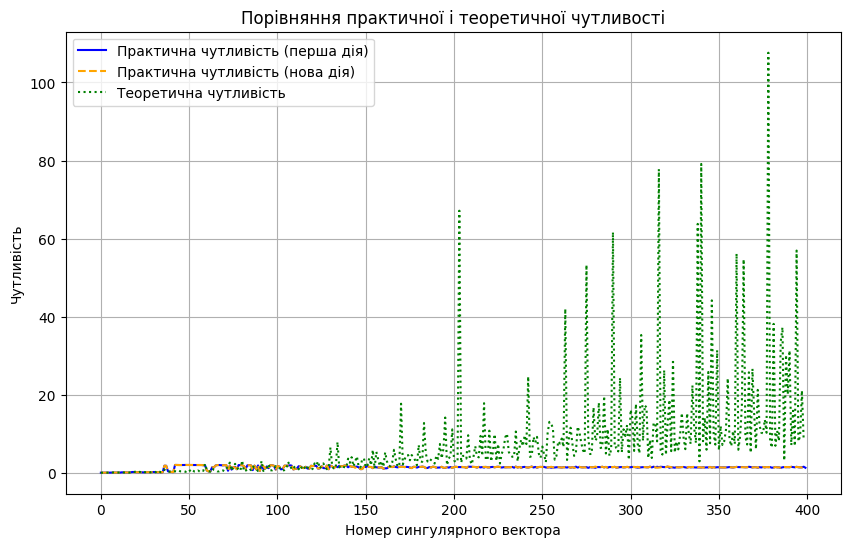

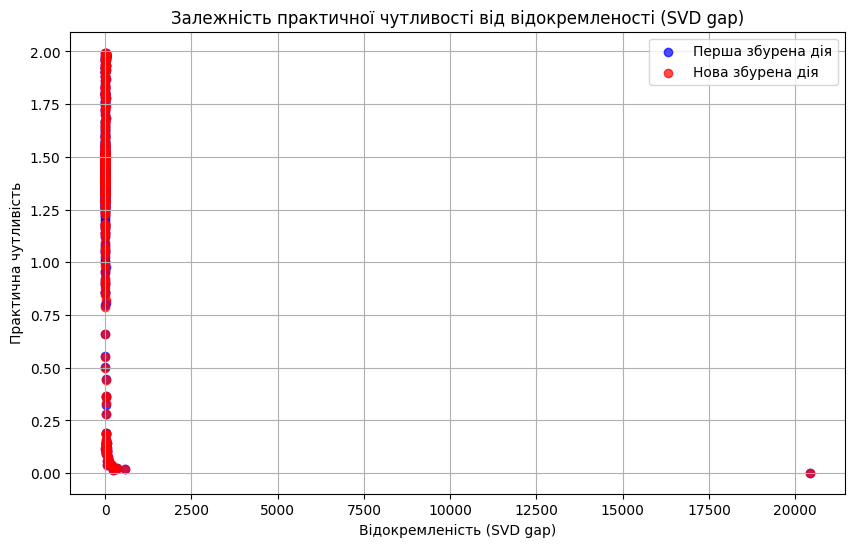

Чутливість сингулярних векторів залежить від відокремленості сингулярних чисел.
Максимальні сингулярні числа забезпечують найменшу чутливість до збурень.


In [58]:
import numpy as np
import matplotlib.pyplot as plt



# Додаємо другий рівень шуму (нова збурена дія)
d2 = 0.005  # Дисперсія другого шуму
noise_2 = np.random.normal(0, np.sqrt(d2), matrix_A.shape)
matrix_A_noisy_new = matrix_A + noise_2

# Виконуємо сингулярне розкладання для всіх матриць
U, S, Vt = np.linalg.svd(matrix_A, full_matrices=False)
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(noisy_matrix_A, full_matrices=False)
U_new, S_new, Vt_new = np.linalg.svd(matrix_A_noisy_new, full_matrices=False)

# Обчислюємо збурення сингулярних чисел
delta_singular_values = np.abs(S - S_noisy)  # Збурення для першої збуреної дії
relative_delta_singular_values_new = np.abs(S_noisy - S_new)  # Збурення для нової дії

# Обчислення чутливості сингулярних векторів
svd_gap = np.array([S[i] - S[i + 1] if i < len(S) - 1 else 0 for i in range(len(S))])
theoretical_sensitivity = np.linalg.norm(noise_1) / svd_gap
practical_sensitivity = [np.linalg.norm(U[:, i] - U_noisy[:, i]) for i in range(len(S))]
practical_sensitivity_new = [np.linalg.norm(U_noisy[:, i] - U_new[:, i]) for i in range(len(S))]

# Побудова графіків
# Графік 1: Порівняння сингулярних чисел
plt.figure(figsize=(10, 6))
plt.plot(S, label="Оригінал", color='black')
plt.plot(S_noisy, label="Перша збурена дія", color='blue', alpha=0.7)
plt.plot(S_new, label="Нова збурена дія", color='red', linestyle='dashed', alpha=0.7)
plt.title("Порівняння сингулярних чисел для різних збурень")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Значення сингулярного числа")
plt.legend()
plt.grid(True)
plt.show()

# Графік 2: Порівняння абсолютних змін сингулярних чисел
plt.figure(figsize=(10, 6))
plt.plot(delta_singular_values, label="Перша збурена дія", color='blue')
plt.plot(relative_delta_singular_values_new, label="Нова збурена дія", color='red', linestyle='dashed')
plt.title("Порівняння збурень сингулярних чисел для різних дій")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Абсолютне збурення")
plt.legend()
plt.grid(True)
plt.show()

# Графік 3: Теоретична і практична чутливість
plt.figure(figsize=(10, 6))
plt.plot(practical_sensitivity, label="Практична чутливість (перша дія)", color='blue')
plt.plot(practical_sensitivity_new, label="Практична чутливість (нова дія)", color='orange', linestyle='dashed')
plt.plot(theoretical_sensitivity, label="Теоретична чутливість", color='green', linestyle='dotted')
plt.title("Порівняння практичної і теоретичної чутливості")
plt.xlabel("Номер сингулярного вектора")
plt.ylabel("Чутливість")
plt.legend()
plt.grid()
plt.show()

# Графік 4: Залежність практичної чутливості від відокремленості (SVD gap)
plt.figure(figsize=(10, 6))
plt.scatter(svd_gap, practical_sensitivity, label="Перша збурена дія", color='blue', alpha=0.7)
plt.scatter(svd_gap, practical_sensitivity_new, label="Нова збурена дія", color='red', alpha=0.7)
plt.title("Залежність практичної чутливості від відокремленості (SVD gap)")
plt.xlabel("Відокремленість (SVD gap)")
plt.ylabel("Практична чутливість")
plt.legend()
plt.grid(True)
plt.show()

# Висновки
print("Чутливість сингулярних векторів залежить від відокремленості сингулярних чисел.")
print("Максимальні сингулярні числа забезпечують найменшу чутливість до збурень.")


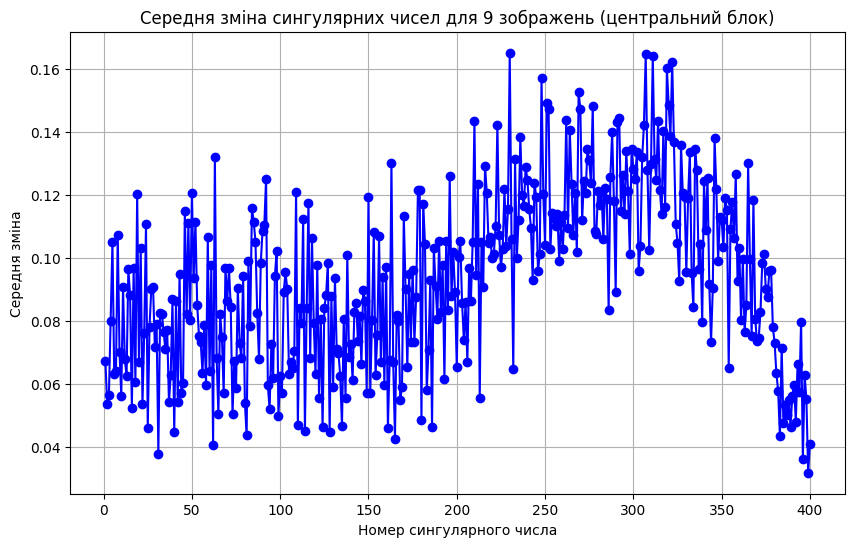

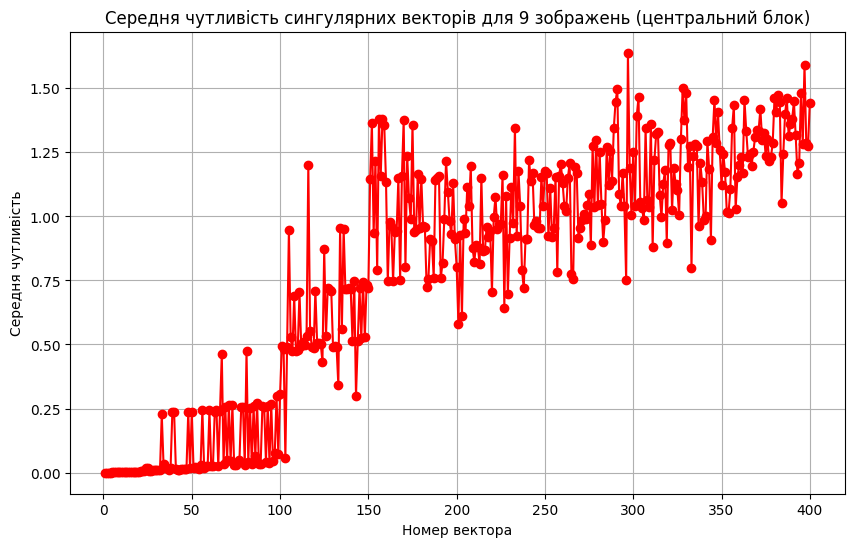

In [65]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Імена файлів
file_names = [
    "img_1.jpg", "img_2.jpg", "img_3.jpg", "img_4.jpg", "img_5.jpg",
    "img_6.jpg", "img_7.jpg", "img_8.jpg", "img_9.jpg"
]

# Параметри
N = 400  # Розмір блоку
new_noise_std = 0.1  # Стандартне відхилення шуму

# Ініціалізуємо масиви для збереження результатів
average_singular_value_changes = None
average_vector_sensitivity = None

# Проходимо по кожному зображенню
for file_name in file_names:
    # Завантажуємо зображення
    image_path = os.path.join("F://DS//bezpeka_is//", file_name)  # Замініть на ваш шлях
    image = cv2.imread(image_path)
    if image is None:
        print(f"Не вдалося завантажити зображення: {file_name}")
        continue

    # Виділяємо центральний блок N x N
    height, width, _ = image.shape
    center_y, center_x = height // 2, width // 2
    start_y, start_x = center_y - N // 2, center_x - N // 2
    green_channel = image[start_y:start_y + N, start_x:start_x + N, 1]
    matrix_A = green_channel.astype(float)

    # Виконуємо сингулярне розкладання
    U, S_original, Vt = np.linalg.svd(matrix_A, full_matrices=False)

    # Генеруємо шум
    noise = np.random.normal(0, new_noise_std, matrix_A.shape)
    noisy_matrix_A = matrix_A + noise

    # Виконуємо сингулярне розкладання для зашумленого зображення
    U_noisy, S_noisy, Vt_noisy = np.linalg.svd(noisy_matrix_A, full_matrices=False)

    # Зміна сингулярних чисел
    singular_value_diff = np.abs(S_original - S_noisy)

    # Чутливість векторів
    vector_sensitivity = np.array([
        np.linalg.norm(U[:, j] - U_noisy[:, j])
        for j in range(U.shape[1])
    ])

    # Агрегуємо результати
    if average_singular_value_changes is None:
        average_singular_value_changes = singular_value_diff
        average_vector_sensitivity = vector_sensitivity
    else:
        average_singular_value_changes += singular_value_diff
        average_vector_sensitivity += vector_sensitivity

# Розраховуємо середні значення
average_singular_value_changes /= len(file_names)
average_vector_sensitivity /= len(file_names)

# Побудова графіка середньої зміни сингулярних чисел
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(average_singular_value_changes) + 1), average_singular_value_changes, marker='o', color='blue')
plt.title("Середня зміна сингулярних чисел для 9 зображень (центральний блок)")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("Середня зміна")
plt.grid(True)
plt.show()

# Побудова графіка середньої чутливості сингулярних векторів
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(average_vector_sensitivity) + 1), average_vector_sensitivity, marker='o', color='red')
plt.title("Середня чутливість сингулярних векторів для 9 зображень (центральний блок)")
plt.xlabel("Номер вектора")
plt.ylabel("Середня чутливість")
plt.grid(True)
plt.show()


### Аналіз графіків

#### Перший графік (Середня зміна сингулярних чисел):
- Найбільша зміна спостерігається для першого (домінуючого) сингулярного числа.
- Решта сингулярних чисел демонструють незначні зміни.

#### Другий графік (Середня чутливість сингулярних векторів):
- Чутливість векторів зростає зі зменшенням сингулярних чисел.
- Найменш чутливі вектори відповідають найбільшим сингулярним числам.


c:\Users\oftuadmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


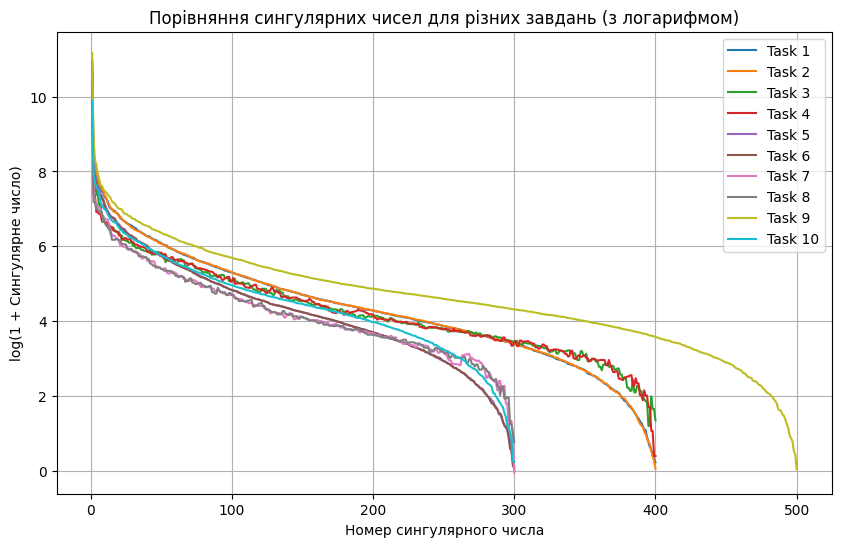

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Ініціалізація параметрів для порівняння
params = [
    {"K": "G", "N": 400, "decomposition": "SVD", "noise_type": "Gaussian", "noise_param": 0.0001},
    {"K": "B", "N": 400, "decomposition": "SVD", "noise_type": "Multiplicative", "noise_param": 0.0001},
    {"K": "G", "N": 400, "decomposition": "Spectral", "noise_type": "Gaussian", "noise_param": 0.0001},
    {"K": "B", "N": 400, "decomposition": "Spectral", "noise_type": "Multiplicative", "noise_param": 0.0001},
    {"K": "R", "N": 300, "decomposition": "SVD", "noise_type": "Poisson", "noise_param": 0.0001},
    {"K": "G", "N": 300, "decomposition": "SVD", "noise_type": "Multiplicative", "noise_param": 0.00001},
    {"K": "R", "N": 300, "decomposition": "Spectral", "noise_type": "Poisson", "noise_param": 0.0001},
    {"K": "G", "N": 300, "decomposition": "Spectral", "noise_type": "Multiplicative", "noise_param": 0.00001},
    {"K": "G", "N": 500, "decomposition": "SVD", "noise_type": "Custom", "noise_param": None},
    {"K": "B", "N": 300, "decomposition": "SVD", "noise_type": "Custom", "noise_param": None},
]

# Функція для виконання завдань
def compare_task(image, param):
    # Виділення кольорового каналу
    if param["K"] == "G":
        channel = image[:param["N"], :param["N"], 1]  # Зелений
    elif param["K"] == "B":
        channel = image[:param["N"], :param["N"], 0]  # Синій
    elif param["K"] == "R":
        channel = image[:param["N"], :param["N"], 2]  # Червоний
    else:
        raise ValueError("Невідомий канал")
    matrix_A = channel.astype(float)

    # Додавання шуму
    if param["noise_type"] == "Gaussian":
        noise = np.random.normal(0, param["noise_param"], matrix_A.shape)
    elif param["noise_type"] == "Multiplicative":
        noise = np.random.normal(0, param["noise_param"], matrix_A.shape) * matrix_A
    elif param["noise_type"] == "Poisson":
        noise = np.random.poisson(param["noise_param"], matrix_A.shape)
    elif param["noise_type"] == "Custom":
        noise = np.random.uniform(-5, 5, matrix_A.shape)
    else:
        raise ValueError("Невідомий тип шуму")
    noisy_matrix_A = np.clip(matrix_A + noise, 0, 255)

    # Виконання розкладання
    if param["decomposition"] == "SVD":
        _, singular_values, _ = np.linalg.svd(noisy_matrix_A, full_matrices=False)
    elif param["decomposition"] == "Spectral":
        singular_values = np.linalg.eigvals(noisy_matrix_A)
    else:
        raise ValueError("Невідомий тип розкладання")
    
    return singular_values

# Завантаження зображення
image = cv2.imread("photo_1.jpg")
if image is None:
    raise ValueError("Не вдалося завантажити зображення")

# Порівняння варіантів завдань
results = []
for param in params[:10]:  
    singular_values = compare_task(image, param)
    results.append(singular_values)

# Побудова графіків для порівняння
plt.figure(figsize=(10, 6))
for i, singular_values in enumerate(results):
    # Використовуємо логарифм для сингулярних чисел
    log_singular_values = np.log1p(singular_values)  # log(1 + x), щоб уникнути проблем з нулями
    plt.plot(range(1, len(log_singular_values) + 1), log_singular_values, label=f"Task {i+1}")
plt.title("Порівняння сингулярних чисел для різних завдань (з логарифмом)")
plt.xlabel("Номер сингулярного числа")
plt.ylabel("log(1 + Сингулярне число)")
plt.legend()
plt.grid(True)
plt.show()


# Аналіз графіка

1. **Загальна тенденція**: Сингулярні числа спадають зі зростанням номера, що очікувано.
2. **Відмінності між задачами**: Найбільші числа менш чутливі до шуму, тоді як малі значення (200–400) відрізняються залежно від типу шуму.
3. **Вплив шуму**: Gaussian і Poisson шуми створюють плавніший спад, Multiplicative — більші відмінності.
4. **Логарифмічний масштаб**: Дає змогу краще побачити вплив шуму на середні й малі числа.
5. **Висновок**: Найбільші числа стабільні, а середні й малі чутливі до типу шуму та методу розкладання.
